In [388]:
import pandas as pd

A listing of the specific counties that flipped: 
http://www.npr.org/2016/11/15/502032052/lots-of-people-voted-for-obama-and-trump-heres-where-in-3-charts

Nate Silver postulates that education level is a key predictor. http://fivethirtyeight.com/features/education-not-income-predicted-who-would-vote-for-trump/?ex_cid=story-twitter 

Daily Kos article: http://www.dailykos.com/story/2017/1/30/1627319/-Daily-Kos-Elections-presents-the-2016-presidential-election-results-by-congressional-district

Diversity Index scource: https://www.kaggle.com/mikejohnsonjr/us-counties-diversity-index

In [389]:
election = pd.read_csv('2016_election.csv')

In [390]:
prev_election = pd.read_csv('2012_election.csv')

In [391]:
ui_change = pd.read_csv('County_Data_2016.csv')

In [392]:
div = pd.read_csv('diversityindex.csv')

In [393]:
edu = pd.read_excel('education_25_older_filt.xls')

Change in education the past 10 years--find the difference between them for each county

In [394]:
pop = pd.read_excel('us_county_populations.xls')

In [395]:
len(edu)

3283

len(pop)

In [396]:
pop.dtypes

state              object
county             object
est_pop_2015        int64
pop_change_2015     int64
int_mig_2015        int64
dom_mig_2015        int64
mig_2015            int64
dtype: object

2013 Diversity Index breaks down US ethnic demographics by county.

In [397]:
div.head()

Location  Diversity-Index  \
0  Aleutians West Census Area, AK         0.769346   
1               Queens County, NY         0.742224   
2                 Maui County, HI         0.740757   
3              Alameda County, CA         0.740399   
4      Aleutians East Borough, AK         0.738867   

   Black or African American alone, percent, 2013  \
0                                             7.4   
1                                            20.9   
2                                             0.8   
3                                            12.4   
4                                             7.7   

   American Indian and Alaska Native alone, percent, 2013  \
0                                               13.8        
1                                                1.3        
2                                                0.6        
3                                                1.2        
4                                               21.8        

   Asian alone, percent, 2013  \
0                        31.1   
1                        25.2   
2                        28.8   
3                        28.2   
4                        41.4   

   Native Hawaiian and Other Pacific Islander alone, percent,  \
0                                                2.3            
1                                                0.2            
2                                               10.6            
3                                                1.0            
4                                                0.7            

   Two or More Races, percent, 2013  Hispanic or Latino, percent, 2013  \
0                               4.8                               14.6   
1                               2.7                               28.0   
2                              23.3                               10.7   
3                               5.2                               22.7   
4                               3.7                               13.5   

   White alone, not Hispanic or Latino, percent, 2013  
0                                               29.2   
1                                               26.7   
2                                               31.5   
3                                               33.2   
4                                               12.9

In [398]:
div = div.rename(columns={'Location':'county_state','Diversity-Index':'div_index','Black or African American alone, percent, 2013':'af_am','American Indian and Alaska Native alone, percent, 2013':'native_2013','Asian alone, percent, 2013':'asian_am','Native Hawaiian and Other Pacific Islander alone, percent,':'pac_am','Two or More Races, percent, 2013':'two_or_more_races','Hispanic or Latino, percent, 2013':'hisp_lat_am','White alone, not Hispanic or Latino, percent, 2013':'white_am'})

In [399]:
len(div)

3195

In [400]:
election.county_name.count()

3141

In [401]:
# Need to drop Alaska as it doesn't have any county names
election = election[election.county_name!='Alaska']
pop = pop[pop.county!='Alaska']

In [402]:
#election = election.drop(election[[0,10]], axis=1)

In [403]:
election['county_state'] = election['county_name'] + ', ' + election['state_abbr']

In [404]:
prev_election['county_state'] = prev_election['county_name'] + ', ' + prev_election['state_abbr']

In [405]:
ui_change['county_state'] = ui_change['county_name'] + ', ' + ui_change['state_abbrev']

2015 population table counts population levels and shifts per county.

In [406]:
pop.head()

state          county  est_pop_2015  pop_change_2015  int_mig_2015  \
0    AL         Alabama       4858979            12568          5726   
1    AL  Autauga County         55347               57            19   
2    AL  Baldwin County        203709             3996           221   
3    AL  Barbour County         26489             -326             0   
4    AL     Bibb County         22583               34            21   

   dom_mig_2015  mig_2015  
0         -2268      3458  
1          -140      -121  
2          3469      3690  
3          -281      -281  
4             4        25

In [407]:
pop['county_state'] = pop['county'] + ', ' + pop['state']

In [408]:
edu['county_state'] = edu['Area name'] + ', ' + edu['State']

In [409]:
edu.isnull().sum()

FIPS Code                                0
State                                    0
Area name                                0
less_hs_diploma_2000                    11
hs_diploma_only_2000                    11
less_4_years_2000                       11
four_or_ higher_2000                    11
per_less_high_school diploma_2000       11
per_hs_diploma_only_2000                11
per_less_4_years_2000                   11
per_four_or_ higher_2000                11
less_high_school_diploma_2011_15        10
hs_diploma_only_2011_15                 10
less_4_years_2011_15                    10
four_or_ higher_2011_15                 10
per_less_high_school_diploma_2011_15    10
per_hs_diploma_only_2011_15             10
per_less_4_years_2011_15                10
per_four_or_higher_2011_15              10
county_state                             0
dtype: int64

In [410]:
edu = edu.dropna()

Education table lists number and percentage per county of education levels in 2000 and 2011-2015.

In [411]:
edu.head()

FIPS Code State       Area name  less_hs_diploma_2000  \
0          0    US   United States            35715625.0   
1       1000    AL         Alabama              714081.0   
2       1001    AL  Autauga County                5872.0   
3       1003    AL  Baldwin County               17258.0   
4       1005    AL  Barbour County                6679.0   

   hs_diploma_only_2000  less_4_years_2000  four_or_ higher_2000  \
0            52168981.0         49864428.0            44462605.0   
1              877216.0           746495.0              549608.0   
2                9332.0             7413.0                4972.0   
3               28428.0            28178.0               22146.0   
4                6124.0             4025.0                2068.0   

   per_less_high_school diploma_2000  per_hs_diploma_only_2000  \
0                               19.6                      28.6   
1                               24.7                      30.4   
2                               21.3                      33.8   
3                               18.0                      29.6   
4                               35.3                      32.4   

   per_less_4_years_2000  per_four_or_ higher_2000  \
0                   27.4                      24.4   
1                   25.9                      19.0   
2                   26.9                      18.0   
3                   29.3                      23.1   
4                   21.3                      10.9   

   less_high_school_diploma_2011_15  hs_diploma_only_2011_15  \
0                        28229094.0               58722528.0   
1                          509891.0                1005295.0   
2                            4656.0                  12182.0   
3                           14360.0                  39431.0   
4                            5021.0                   6490.0   

   less_4_years_2011_15  four_or_ higher_2011_15  \
0            61558628.0               62952272.0   
1              962515.0                 761650.0   
2               11044.0                   8437.0   
3               43500.0                  39710.0   
4                4943.0                   2354.0   

   per_less_high_school_diploma_2011_15  per_hs_diploma_only_2011_15  \
0                                  13.3                         27.8   
1                                  15.7                         31.0   
2                                  12.8                         33.5   
3                                  10.5                         28.8   
4                                  26.7                         34.5   

   per_less_4_years_2011_15  per_four_or_higher_2011_15        county_state  
0                      29.1                        29.8   United States, US  
1                      29.7                        23.5         Alabama, AL  
2                      30.4                        23.2  Autauga County, AL  
3                      31.8                        29.0  Baldwin County, AL  
4                      26.3                        12.5  Barbour County, AL

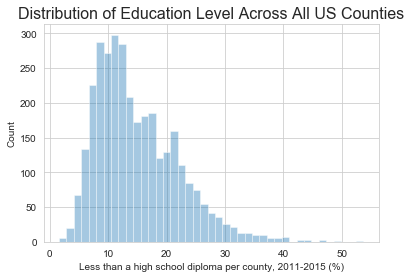

In [412]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
ax = sns.distplot(edu.per_less_high_school_diploma_2011_15, kde=False)
ax.set(xlabel='Less than a high school diploma per county, 2011-2015 (%)', ylabel='Count')
ax.set_title('Distribution of Education Level Across All US Counties', fontsize=16)
plt.show()

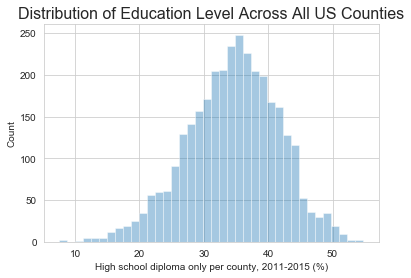

In [413]:
ax = sns.distplot(edu.per_hs_diploma_only_2011_15, kde=False)
ax.set(xlabel='High school diploma only per county, 2011-2015 (%)', ylabel='Count')
ax.set_title('Distribution of Education Level Across All US Counties', fontsize=16)
plt.show()

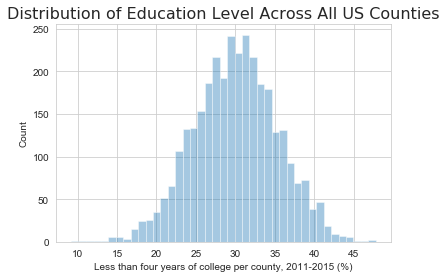

In [414]:
ax = sns.distplot(edu.per_less_4_years_2011_15, kde=False)
ax.set(xlabel='Less than four years of college per county, 2011-2015 (%)', ylabel='Count')
ax.set_title('Distribution of Education Level Across All US Counties', fontsize=16, fontname='Ubuntu')
plt.show()

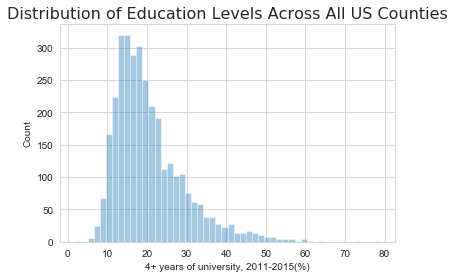

In [415]:
ax = sns.distplot(edu.per_four_or_higher_2011_15, kde=False)
ax.set(xlabel='4+ years of university, 2011-2015(%)', ylabel='Count')
ax.set_title('Distribution of Education Levels Across All US Counties', fontsize=16, fontname='Ubuntu')
plt.show()

In [416]:
election['per_dem'] = election['per_dem'].apply(lambda x: x*100)
election['per_gop'] = election['per_gop'].apply(lambda x: x*100)

In [417]:
prev_election['per_dem_2012'] = prev_election['per_dem_2012'].apply(lambda x: x*100)
prev_election['per_gop_2012'] = prev_election['per_gop_2012'].apply(lambda x: x*100)

In [418]:
election['per_point_diff'] = election['per_point_diff'].apply(lambda x: float(x.strip('%')))

In [419]:
# Making a new column for positive and negative--if per_dem is below 50%, negative. If
# above 50%, positive. 

In [420]:
election['election_range'] = election['per_dem'] - election['per_gop']

In [421]:
prev_election['election_range'] = prev_election['per_dem_2012'] - prev_election['per_gop_2012']

Democrats are in big trouble. Of course, this distribution doesn't mean that they're necessarily losing counties, but of those they held onto in 2016, they have a far, far weaker grasp on them than Republicans do on their counties. Many of the Republican counties are in red states with relatively few electoral votes. However, for the midterm elections this is still a dangerous sign. 

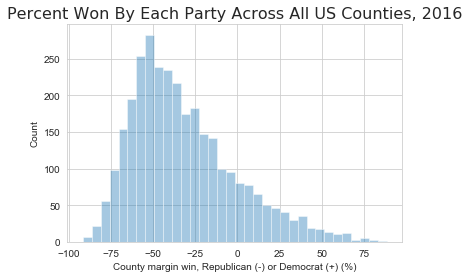

In [422]:
ax = sns.distplot(election.election_range, kde=False)
ax.set(xlabel = "County margin win, Republican (-) or Democrat (+) (%)", ylabel='Count')
ax.set_title('Percent Won By Each Party Across All US Counties, 2016', fontsize=16, fontname='Ubuntu')
plt.show()

In 2012, it was already bad for Democrats. But it's clearly gotten much worse.

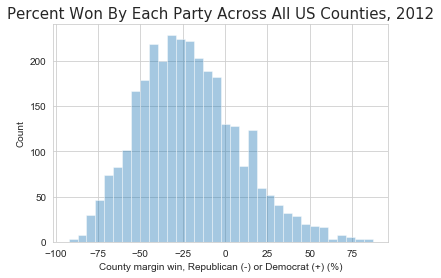

In [423]:
ax = sns.distplot(prev_election.election_range, kde=False)
ax.set(xlabel = "County margin win, Republican (-) or Democrat (+) (%)", ylabel='Count')
ax.set_title('Percent Won By Each Party Across All US Counties, 2012', fontsize=15, fontname='Ubuntu')
plt.show() 

In [424]:
election['slight_dem'] = election['election_range'].apply(lambda x: 0< x <= 10)
election['slight_gop'] = election['election_range'].apply(lambda x: -10 <= x < 0)
election['med_dem'] = election['election_range'].apply(lambda x: 10< x <= 25)
election['med_gop'] = election['election_range'].apply(lambda x: -25 <= x < -10)
election['strong_dem'] = election['election_range'].apply(lambda x: 25 < x <= 50)
election['strong_gop'] = election['election_range'].apply(lambda x: -50 <= x < -25)

The election table now has classes of the margins by which each party won in a particular county: "weak" being up to 10%, "medium" being from 10-25%, and "strong" being from 25-50%. Going beyond the 50% margin wouldn't yield much insight due to a presumable ideological stronghold, or utility to anyone seeking to change that county. 

In [425]:
election.head()

Unnamed: 0  votes_dem  votes_gop  total_votes    per_dem    per_gop  \
29          29     5908.0    18110.0      24661.0  23.956855  73.435789   
30          30    18409.0    72780.0      94090.0  19.565310  77.351472   
31          31     4848.0     5431.0      10390.0  46.660250  52.271415   
32          32     1874.0     6733.0       8748.0  21.422039  76.966164   
33          33     2150.0    22808.0      25384.0   8.469902  89.851875   

      diff  per_point_diff state_abbr     county_name  combined_fips  \
29  12,202           49.48         AL  Autauga County           1001   
30  54,371           57.79         AL  Baldwin County           1003   
31     583            5.61         AL  Barbour County           1005   
32   4,859           55.54         AL     Bibb County           1007   
33  20,658           81.38         AL   Blount County           1009   

          county_state  election_range  slight_dem  slight_gop  med_dem  \
29  Autauga County, AL      -49.478934       False       False    False   
30  Baldwin County, AL      -57.786162       False       False    False   
31  Barbour County, AL       -5.611165       False        True    False   
32     Bibb County, AL      -55.544124       False       False    False   
33   Blount County, AL      -81.381973       False       False    False   

    med_gop  strong_dem  strong_gop  
29    False       False        True  
30    False       False       False  
31    False       False       False  
32    False       False       False  
33    False       False       False

In [426]:
ue_rates = pd.read_excel('Unemployment Rates.xls')

In [427]:
ue_rates.head()

State        county_state labor_force_2015 employed_2015 unemployed_2015  \
0    AL             Alabama          2146157       2015189          130968   
1    AL  Autauga County, AL            25308         23981            1327   
2    AL  Baldwin County, AL            87316         82525            4791   
3    AL  Barbour County, AL             8625          7854             771   
4    AL     Bibb County, AL             8490          7929             561   

  unemployment_rate_2015 med_household_income_2015  
0                    6.1                     44833  
1                    5.2                     56580  
2                    5.5                     52387  
3                    8.9                     31433  
4                    6.6                     40767

In [428]:
ue_rates.dtypes

State                        object
county_state                 object
labor_force_2015             object
employed_2015                object
unemployed_2015              object
unemployment_rate_2015       object
med_household_income_2015    object
dtype: object

In [429]:
ue_rates.describe()

State          county_state  labor_force_2015  employed_2015  \
count   3274                  3274              3274           3274   
unique    52                  3273              3134           3117   
top       TX  District of Columbia              5623           2297   
freq     255                     2                 3              4   

        unemployed_2015  unemployment_rate_2015 med_household_income_2015  
count              3274                    3274                      3274  
unique             1971                     155                      3051  
top                  39                       5                            
freq                  8                      87                        82

In [430]:
ue_rates.labor_force_2015 = pd.to_numeric(ue_rates.labor_force_2015, errors='coerce')
ue_rates.employed_2015 =  pd.to_numeric(ue_rates.employed_2015, errors = 'coerce')
ue_rates.unemployed_2015 =  pd.to_numeric(ue_rates.unemployed_2015, errors = 'coerce')
ue_rates.unemployment_rate_2015 =  pd.to_numeric(ue_rates.unemployment_rate_2015, errors ='coerce')
ue_rates.med_household_income_2015 = pd.to_numeric(ue_rates.med_household_income_2015, errors = 'coerce')

In [431]:
ue_rates.dtypes

State                         object
county_state                  object
labor_force_2015             float64
employed_2015                float64
unemployed_2015              float64
unemployment_rate_2015       float64
med_household_income_2015    float64
dtype: object

The unemployment table (from Department of Labor) shows the unemployment rates per county from 2007-2015. Potentially this could yield some insights.

In [432]:
ue_rates.head()

State        county_state  labor_force_2015  employed_2015  unemployed_2015  \
0    AL             Alabama         2146157.0      2015189.0         130968.0   
1    AL  Autauga County, AL           25308.0        23981.0           1327.0   
2    AL  Baldwin County, AL           87316.0        82525.0           4791.0   
3    AL  Barbour County, AL            8625.0         7854.0            771.0   
4    AL     Bibb County, AL            8490.0         7929.0            561.0   

   unemployment_rate_2015  med_household_income_2015  
0                     6.1                    44833.0  
1                     5.2                    56580.0  
2                     5.5                    52387.0  
3                     8.9                    31433.0  
4                     6.6                    40767.0

Combining all tables

In [433]:
right = election.set_index('county_state')
left = ue_rates.set_index('county_state')
combined_1 = left.join(right, lsuffix='', rsuffix='_r')
combined_1 = combined_1.reset_index()

In [434]:
right = combined_1.set_index('county_state')
left = ui_change.set_index('county_state')
combined_2 = left.join(right, lsuffix='', rsuffix = '_r')
combined_2 = combined_2.reset_index()

In [435]:
right = combined_2.set_index('county_state')
left = div.set_index('county_state')
combined_3 = left.join(right, lsuffix='', rsuffix = '_r')
combined_3 = combined_3.reset_index()

In [436]:
right = combined_3.set_index('county_state')
left = edu.set_index('county_state')
combined_4 = left.join(right, lsuffix='', rsuffix = '_r')
combined_4 = combined_4.reset_index()

In [437]:
right = combined_4.set_index('county_state')
left = pop.set_index('county_state')
combined_5 = left.join(right, lsuffix='', rsuffix = '_r')
combined_5 = combined_5.reset_index()

In [438]:
combined_5.isnull().sum()

county_state                             0
state                                    0
county                                   0
est_pop_2015                             0
pop_change_2015                          0
int_mig_2015                             0
dom_mig_2015                             0
mig_2015                                 0
FIPS Code                                9
State                                    9
Area name                                9
less_hs_diploma_2000                     9
hs_diploma_only_2000                     9
less_4_years_2000                        9
four_or_ higher_2000                     9
per_less_high_school diploma_2000        9
per_hs_diploma_only_2000                 9
per_less_4_years_2000                    9
per_four_or_ higher_2000                 9
less_high_school_diploma_2011_15         9
hs_diploma_only_2011_15                  9
less_4_years_2011_15                     9
four_or_ higher_2011_15                  9
per_less_hi

In [439]:
combined_5.dropna(inplace=True)

In [440]:
combined_5 = combined_5[combined_5.county_name_r!='Alaska']
#Just making sure Alaska isn't included

In [441]:
combined_5.head()

county_state state            county  est_pop_2015  \
0  Abbeville County, SC    SC  Abbeville County         24932   
1     Acadia Parish, LA    LA     Acadia Parish         62577   
2   Accomack County, VA    VA   Accomack County         32973   
3        Ada County, ID    ID        Ada County        434211   
4      Adair County, IA    IA      Adair County          7228   

   pop_change_2015  int_mig_2015  dom_mig_2015  mig_2015  FIPS Code State  \
0                6            22           -12        10    45001.0    SC   
1               79            32          -281      -249    22001.0    LA   
2              -25            81           -53        28    51001.0    VA   
3             7364           933          3838      4771    16001.0    ID   
4             -189             0          -161      -161    19001.0    IA   

   ... state_abbr     county_name_r  combined_fips  election_range  \
0  ...         SC  Abbeville County        45001.0      -28.254383   
1  ...         LA     Acadia Parish        22001.0      -56.674943   
2  ...         VA   Accomack County        51001.0      -11.710568   
3  ...         ID        Ada County        16001.0       -9.239878   
4  ...         IA      Adair County        19001.0      -35.355148   

   slight_dem  slight_gop  med_dem  med_gop  strong_dem  strong_gop  
0       False       False    False    False       False        True  
1       False       False    False    False       False       False  
2       False       False    False     True       False       False  
3       False        True    False    False       False       False  
4       False       False    False    False       False        True  

[5 rows x 65 columns]

In [442]:
election.describe()

Unnamed: 0     votes_dem      votes_gop   total_votes      per_dem  \
count  3112.000000  3.112000e+03    3112.000000  3.112000e+03  3112.000000   
mean   1584.500000  2.006065e+04   19622.378856  4.174537e+04    31.708228   
std     898.501345  7.199807e+04   40442.737492  1.134048e+05    15.358601   
min      29.000000  4.000000e+00      57.000000  6.400000e+01     3.144654   
25%     806.750000  1.166000e+03    3206.000000  4.820500e+03    20.475924   
50%    1584.500000  3.153000e+03    7164.500000  1.094700e+04    28.473862   
75%    2362.250000  9.608500e+03   17448.250000  2.879650e+04    39.999326   
max    3140.000000  1.893770e+06  620285.000000  2.652072e+06    92.846592   

           per_gop  per_point_diff  combined_fips  election_range  
count  3112.000000     3112.000000    3112.000000     3112.000000  
mean     63.613409       39.233014   30651.700514      -31.905181  
std      15.651728       20.793041   14984.654885       30.883786  
min       4.122067        0.040000    1001.000000      -91.636364  
25%      54.947846       22.467500   19038.500000      -54.689887  
50%      66.743096       40.315000   29208.000000      -38.217390  
75%      75.147062       55.462500   46005.500000      -14.876874  
max      95.272727       91.640000   56045.000000       88.724525

In [443]:
len(combined_5)

3104

In [444]:
# All counties, not including those in Alaska.

In [445]:
# Making swing state list based on the crucial swing states this election.

IA = combined_5[combined_5['state_abbr']==('IA')]
WI = combined_5[combined_5['state_abbr']==('WI')]
MI = combined_5[combined_5['state_abbr']==('MI')]
PA = combined_5[combined_5['state_abbr']==('PA')]
FL = combined_5[combined_5['state_abbr']==('FL')]
NC = combined_5[combined_5['state_abbr']==('NC')]
OH = combined_5[combined_5['state_abbr']==('OH')]
MN = combined_5[combined_5['state_abbr']==('MN')]
swing_states= pd.concat([IA, WI, MI, PA, FL, NC, OH, MN])
# 'IA', 'WI','MI','PA','FL','NC','OH','MN'

In [446]:
swing_states.head()

county_state state            county  est_pop_2015  \
4        Adair County, IA    IA      Adair County          7228   
9        Adams County, IA    IA      Adams County          3796   
40   Allamakee County, IA    IA  Allamakee County         13886   
75   Appanoose County, IA    IA  Appanoose County         12529   
106    Audubon County, IA    IA    Audubon County          5773   

     pop_change_2015  int_mig_2015  dom_mig_2015  mig_2015  FIPS Code State  \
4               -189             0          -161      -161    19001.0    IA   
9                -75             0           -80       -80    19003.0    IA   
40              -175            21          -216      -195    19005.0    IA   
75               -99            -2           -61       -63    19007.0    IA   
106              -20             0           -19       -19    19009.0    IA   

     ... state_abbr     county_name_r  combined_fips  election_range  \
4    ...         IA      Adair County        19001.0      -35.355148   
9    ...         IA      Adams County        19003.0      -39.769452   
40   ...         IA  Allamakee County        19005.0      -24.323534   
75   ...         IA  Appanoose County        19007.0      -36.384514   
106  ...         IA    Audubon County        19009.0      -31.251850   

     slight_dem  slight_gop  med_dem  med_gop  strong_dem  strong_gop  
4         False       False    False    False       False        True  
9         False       False    False    False       False        True  
40        False       False    False     True       False       False  
75        False       False    False    False       False        True  
106       False       False    False    False       False        True  

[5 rows x 65 columns]

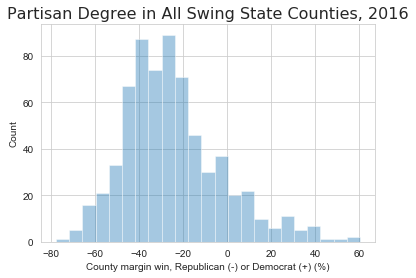

In [447]:
ax = sns.distplot(swing_states.election_range, kde=False)
ax.set(xlabel = "County margin win, Republican (-) or Democrat (+) (%)", ylabel='Count')
ax.set_title('Partisan Degree in All Swing State Counties, 2016', fontsize=16, fontname='Ubuntu')
plt.show()
# As expected, in swing states it's not AS bad for Democrats compared to the rest of the 
# country but still quite dire. 

# Influence of Ethnicity 

In [448]:
import matplotlib.pyplot as plt
import seaborn as sns

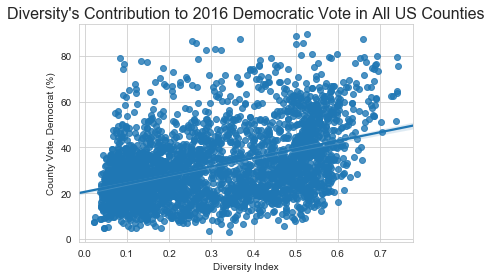

In [449]:
ax = sns.regplot(combined_5.div_index, combined_5.per_dem)
ax.set(xlabel = 'Diversity Index', ylabel = 'County Vote, Democrat (%)')
ax.set_title("Diversity's Contribution to 2016 Democratic Vote in All US Counties", fontsize=16)
plt.show()

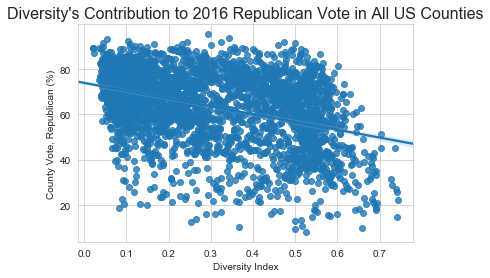

In [450]:
ax = sns.regplot(combined_5.div_index, combined_5.per_gop)
ax.set(xlabel = 'Diversity Index', ylabel = 'County Vote, Republican (%)')
ax.set_title("Diversity's Contribution to 2016 Republican Vote in All US Counties", fontsize=16)
plt.show()

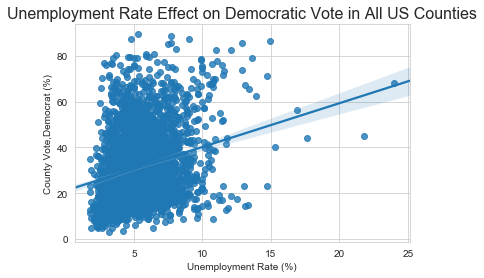

In [451]:
ax = sns.regplot(combined_5.unemployment_rate_2015, combined_5.per_dem)
ax.set(xlabel = 'Unemployment Rate (%)', ylabel = 'County Vote,Democrat (%)')
ax.set_title("Unemployment Rate Effect on Democratic Vote in All US Counties", fontsize=16)
plt.show()

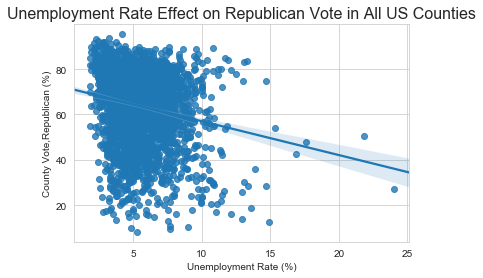

In [452]:
ax = sns.regplot(combined_5.unemployment_rate_2015, combined_5.per_gop)
ax.set(xlabel = 'Unemployment Rate (%)', ylabel = 'County Vote,Republican (%)')
ax.set_title("Unemployment Rate Effect on Republican Vote in All US Counties", fontsize=16)
plt.show()

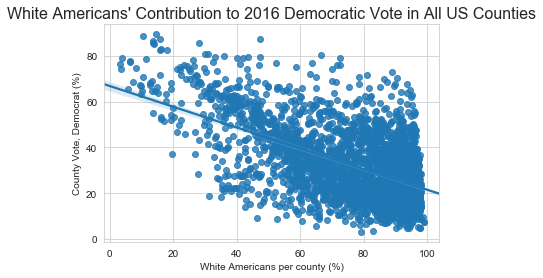

In [453]:
ax = sns.regplot(combined_5.white_am, combined_5.per_dem)
ax.set(xlabel = 'White Americans per county (%)', ylabel = 'County Vote, Democrat (%)')
ax.set_title("White Americans' Contribution to 2016 Democratic Vote in All US Counties", fontsize=16)
plt.show()

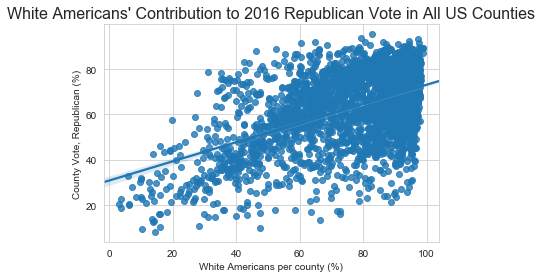

In [454]:
ax = sns.regplot(combined_5.white_am, combined_5.per_gop)
ax.set(xlabel = 'White Americans per county (%)', ylabel = 'County Vote, Republican (%)')
ax.set_title("White Americans' Contribution to 2016 Republican Vote in All US Counties", fontsize=16)
plt.show()
# It's scattered, but there is stil a strong correlation between percentage white 
# population and Republican vote. 

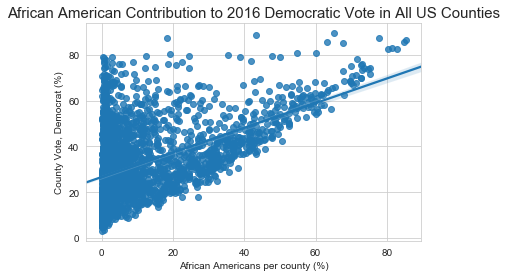

In [455]:
ax = sns.regplot(combined_5.af_am, combined_5.per_dem)
ax.set(xlabel = 'African Americans per county (%)', ylabel = 'County Vote, Democrat (%)')
ax.set_title('African American Contribution to 2016 Democratic Vote in All US Counties', fontsize=15)
plt.show()

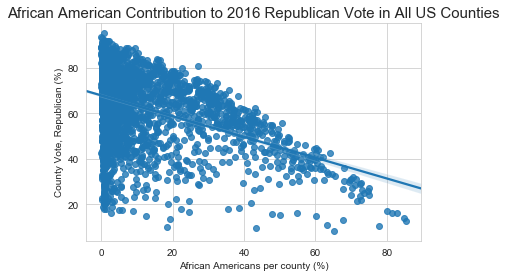

In [456]:
ax = sns.regplot(combined_5.af_am, combined_5.per_gop)
ax.set(xlabel = 'African Americans per county (%)', ylabel = 'County Vote, Republican (%)')
ax.set_title('African American Contribution to 2016 Republican Vote in All US Counties', fontsize=15)
plt.show()

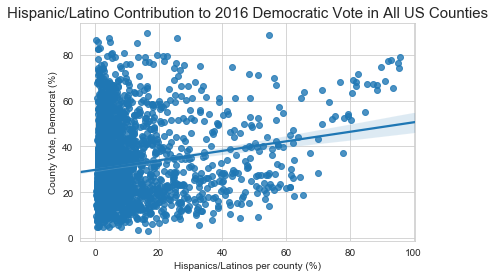

In [457]:
ax = sns.regplot(combined_5.hisp_lat_am, combined_5.per_dem)
ax.set(xlabel = 'Hispanics/Latinos per county (%)', ylabel = 'County Vote, Democrat (%)')
ax.set_title('Hispanic/Latino Contribution to 2016 Democratic Vote in All US Counties', fontsize=15)
plt.show()

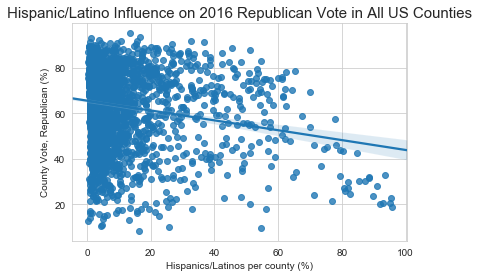

In [458]:
ax = sns.regplot(combined_5.hisp_lat_am, combined_5.per_gop)
ax.set(xlabel = 'Hispanics/Latinos per county (%)', ylabel = 'County Vote, Republican (%)')
ax.set_title('Hispanic/Latino Influence on 2016 Republican Vote in All US Counties', fontsize=15)
plt.show()
# A correlation is there, but it's not that strong due to the sheer amount of 
# counties with little hispanic/latino population.

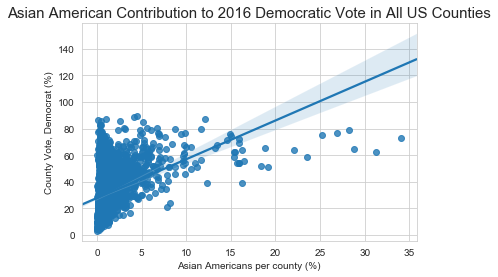

In [459]:
ax = sns.regplot(combined_5.asian_am, combined_5.per_dem)
ax.set(xlabel = 'Asian Americans per county (%)', ylabel = 'County Vote, Democrat (%)')
ax.set_title('Asian American Contribution to 2016 Democratic Vote in All US Counties', fontsize=15)
plt.show()

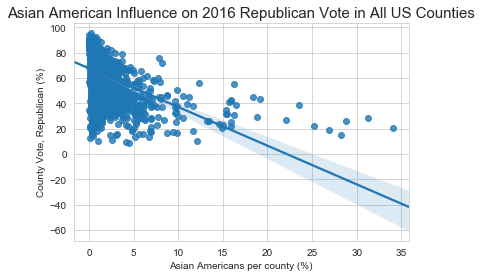

In [460]:
ax = sns.regplot(combined_5.asian_am, combined_5.per_gop)
ax.set(xlabel = 'Asian Americans per county (%)', ylabel = 'County Vote, Republican (%)')
ax.set_title('Asian American Influence on 2016 Republican Vote in All US Counties', fontsize=15)
plt.show()

## Swing States

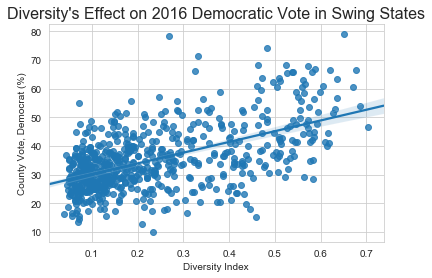

In [461]:
ax = sns.regplot(swing_states.div_index, swing_states.per_dem)
ax.set(xlabel = 'Diversity Index', ylabel = 'County Vote, Democrat (%)')
ax.set_title("Diversity's Effect on 2016 Democratic Vote in Swing States", fontsize=16)
plt.show()
# There appears to be a more pronounced effect of diversity in the swing states.

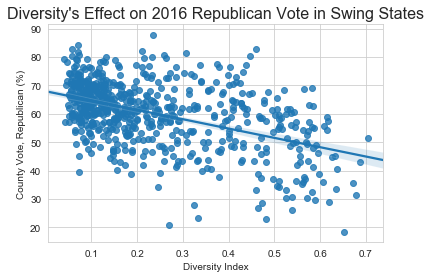

In [462]:
ax = sns.regplot(swing_states.div_index, swing_states.per_gop)
ax.set(xlabel = 'Diversity Index', ylabel = 'County Vote, Republican (%)')
ax.set_title("Diversity's Effect on 2016 Republican Vote in Swing States", fontsize=16)
plt.show()

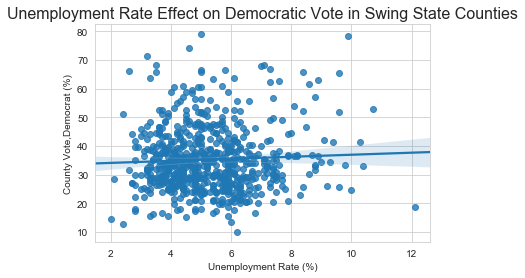

In [463]:
ax = sns.regplot(swing_states.unemployment_rate_2015, swing_states.per_dem)
ax.set(xlabel = 'Unemployment Rate (%)', ylabel = 'County Vote,Democrat (%)')
ax.set_title("Unemployment Rate Effect on Democratic Vote in Swing State Counties", fontsize=16)
plt.show()

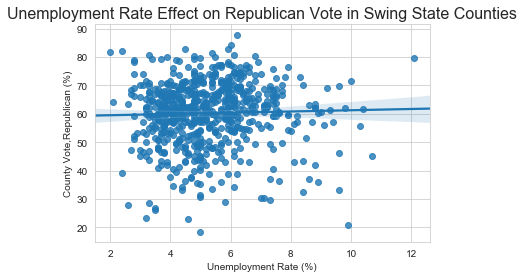

In [464]:
ax = sns.regplot(swing_states.unemployment_rate_2015, swing_states.per_gop)
ax.set(xlabel = 'Unemployment Rate (%)', ylabel = 'County Vote,Republican (%)')
ax.set_title("Unemployment Rate Effect on Republican Vote in Swing State Counties", fontsize=16)
plt.show()
# No discernable effect in the swing states

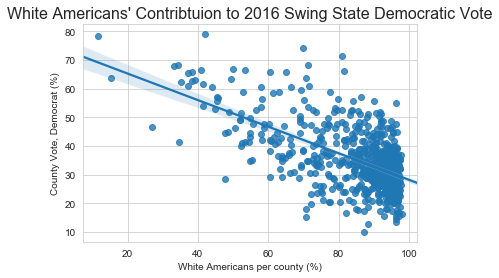

In [465]:
ax = sns.regplot(swing_states.white_am, swing_states.per_dem)
ax.set(xlabel = 'White Americans per county (%)', ylabel = 'County Vote, Democrat (%)')
ax.set_title("White Americans' Contribtuion to 2016 Swing State Democratic Vote", fontsize=16)
plt.show()

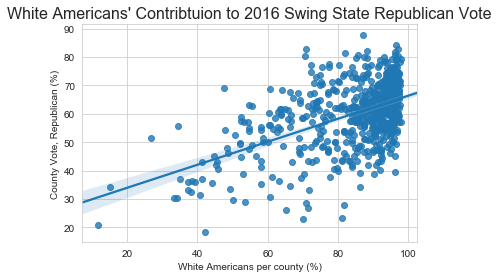

In [466]:
ax = sns.regplot(swing_states.white_am, swing_states.per_gop)
ax.set(xlabel = 'White Americans per county (%)', ylabel = 'County Vote, Republican (%)')
ax.set_title("White Americans' Contribtuion to 2016 Swing State Republican Vote", fontsize=16)
plt.show()

In [467]:
# Look for how incomes of white americans influence how they vote.

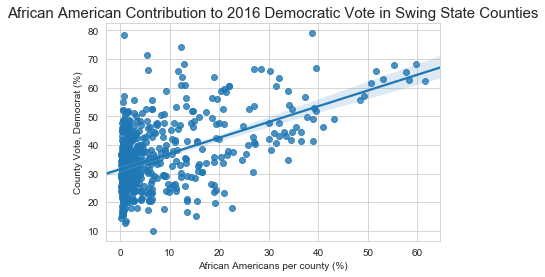

In [468]:
ax = sns.regplot(swing_states.af_am, swing_states.per_dem)
ax.set(xlabel = 'African Americans per county (%)', ylabel = 'County Vote, Democrat (%)')
ax.set_title('African American Contribution to 2016 Democratic Vote in Swing State Counties', fontsize=15)
plt.show()

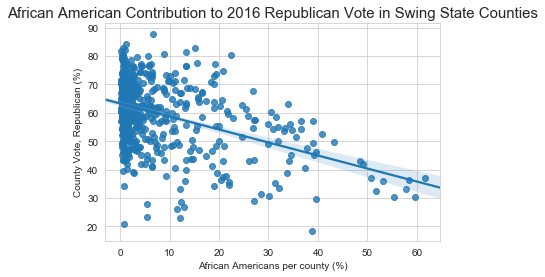

In [469]:
ax = sns.regplot(swing_states.af_am, swing_states.per_gop)
ax.set(xlabel = 'African Americans per county (%)', ylabel = 'County Vote, Republican (%)')
ax.set_title('African American Contribution to 2016 Republican Vote in Swing State Counties', fontsize=15)
plt.show()

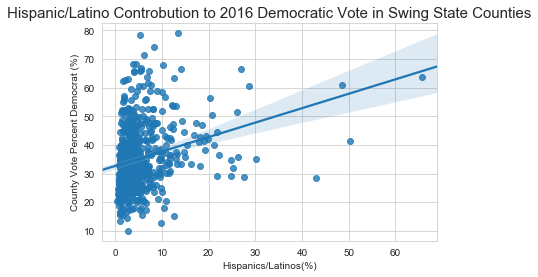

In [470]:
ax = sns.regplot(swing_states.hisp_lat_am, swing_states.per_dem)
ax.set(xlabel = 'Hispanics/Latinos(%)', ylabel = 'County Vote Percent Democrat (%)')
ax.set_title('Hispanic/Latino Controbution to 2016 Democratic Vote in Swing State Counties', fontsize=15)
plt.show()

In [471]:
# Again, a scattered, but strong correlation.

# Influence of Education 

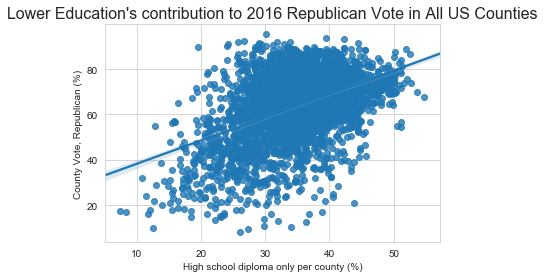

In [472]:
ax = sns.regplot(combined_5.per_hs_diploma_only_2011_15, combined_5.per_gop)
ax.set(xlabel = 'High school diploma only per county (%)', ylabel = 'County Vote, Republican (%)')
ax.set_title("Lower Education's contribution to 2016 Republican Vote in All US Counties", fontsize=16)
plt.show()

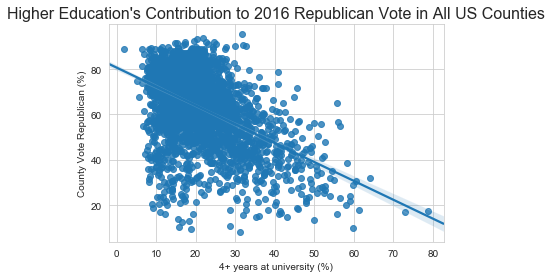

In [473]:
ax = sns.regplot(combined_5.per_four_or_higher_2011_15, combined_5.per_gop)
ax.set(xlabel = '4+ years at university (%)', ylabel = 'County Vote Republican (%)')
ax.set_title("Higher Education's Contribution to 2016 Republican Vote in All US Counties", fontsize=16)
plt.show()

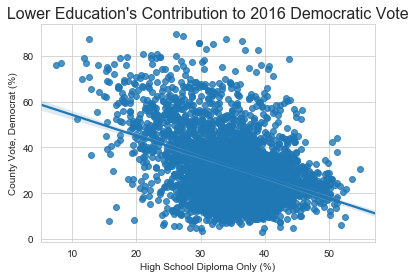

In [474]:
ax = sns.regplot(combined_5.per_hs_diploma_only_2011_15, combined_5.per_dem)
ax.set(xlabel = 'High School Diploma Only (%)', ylabel = 'County Vote, Democrat (%)')
ax.set_title("Lower Education's Contribution to 2016 Democratic Vote", fontsize=16)
plt.show()

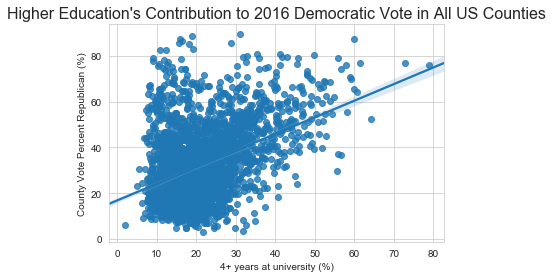

In [475]:
ax = sns.regplot(combined_5.per_four_or_higher_2011_15, combined_5.per_dem)
ax.set(xlabel = '4+ years at university (%)', ylabel = 'County Vote Percent Republican (%)')
ax.set_title("Higher Education's Contribution to 2016 Democratic Vote in All US Counties", fontsize=16)
plt.show()

## Swing States

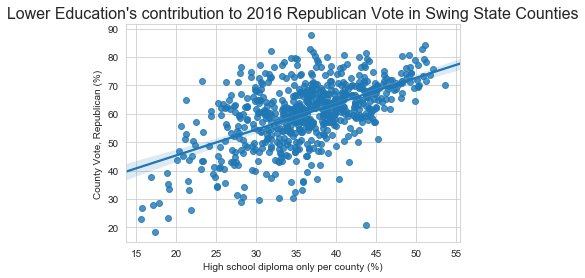

In [476]:
ax = sns.regplot(swing_states.per_hs_diploma_only_2011_15, swing_states.per_gop)
ax.set(xlabel = 'High school diploma only per county (%)', ylabel = 'County Vote, Republican (%)')
ax.set_title("Lower Education's contribution to 2016 Republican Vote in Swing State Counties", fontsize=16)
plt.show()

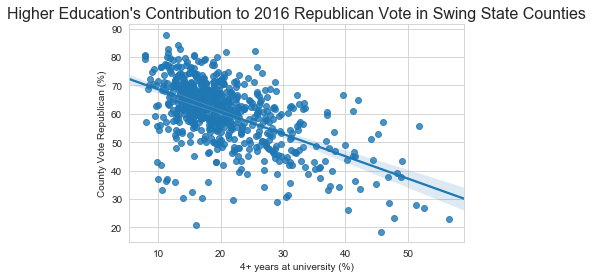

In [477]:
ax = sns.regplot(swing_states.per_four_or_higher_2011_15, swing_states.per_gop)
ax.set(xlabel = '4+ years at university (%)', ylabel = 'County Vote Republican (%)')
ax.set_title("Higher Education's Contribution to 2016 Republican Vote in Swing State Counties", fontsize=16)
plt.show()

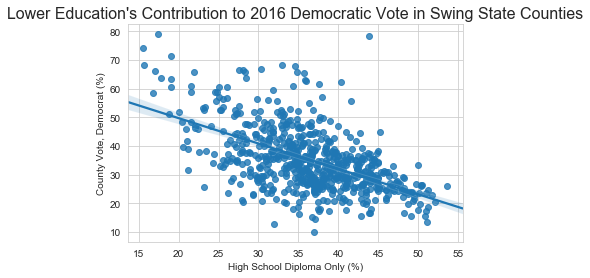

In [478]:
ax = sns.regplot(swing_states.per_hs_diploma_only_2011_15, swing_states.per_dem)
ax.set(xlabel = 'High School Diploma Only (%)', ylabel = 'County Vote, Democrat (%)')
ax.set_title("Lower Education's Contribution to 2016 Democratic Vote in Swing State Counties", fontsize=16)
plt.show()

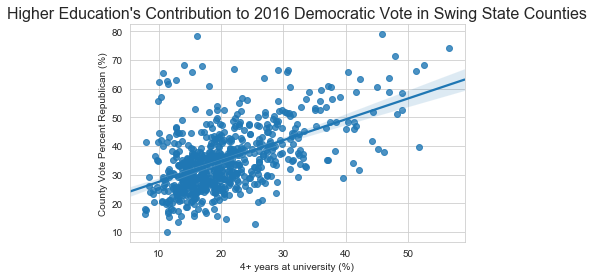

In [479]:
ax = sns.regplot(swing_states.per_four_or_higher_2011_15, swing_states.per_dem)
ax.set(xlabel = '4+ years at university (%)', ylabel = 'County Vote Percent Republican (%)')
ax.set_title("Higher Education's Contribution to 2016 Democratic Vote in Swing State Counties", fontsize=16)
plt.show()

If a county has a higher percentage of people with only a high school diploma, then more likely they'll vote Republican. If a county has a higher proportion of 4+ college degrees, then more likely to go Democrat. Pretty much aligns with Nate Silver's argument that education was the best indicator. 

## Labor Force

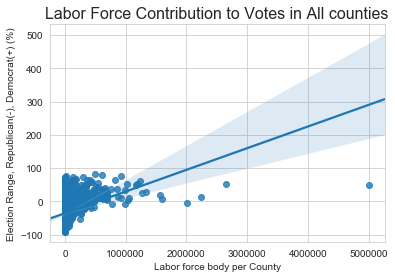

In [480]:
#Labor force participation per county tends to benefit Democrats.
ax = sns.regplot(combined_5.labor_force_2015, combined_5.election_range)
ax.set(xlabel = 'Labor force body per County', ylabel = 'Election Range, Republican(-), Democrat(+) (%)')
ax.set_title("Labor Force Contribution to Votes in All counties", fontsize=16)
plt.show()

## Population 

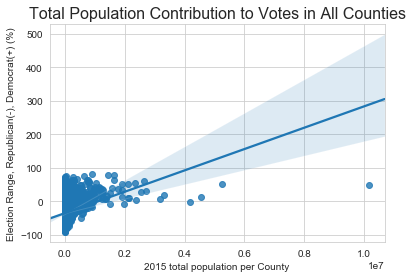

In [481]:
ax = sns.regplot(combined_5.est_pop_2015, combined_5.election_range)
ax.set(xlabel = '2015 total population per County', ylabel = 'Election Range, Republican(-), Democrat(+) (%)')
ax.set_title("Total Population Contribution to Votes in All Counties", fontsize=16)
plt.show()

In [482]:
# Population size per county does correlate with vote.

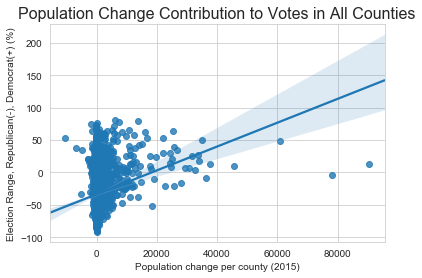

In [483]:
ax = sns.regplot(combined_5.pop_change_2015, combined_5.election_range)                                                                                              
ax.set(xlabel = 'Population change per county (2015)', ylabel = 'Election Range, Republican(-), Democrat(+) (%)')
ax.set_title("Population Change Contribution to Votes in All Counties", fontsize=16)
plt.show()

In [484]:
# Counties that experienced a positve change in population saw a boost for Dems.

In [485]:
# Although there is that cluster towards zero, and the correlation is broad, there
# is still something there.

# Modeling

## Regression

Most predictive features for counties' vote found through EDA:

(note that these variables, sometimes by their nature, don't necessarily follow a normal distribution)

Percentage White American population

Percentage African American population 

Percentage Asian American population

Percentage High School Diploma only

Percentage Four or more years of University

In [486]:
combined_5

county_state state                  county  est_pop_2015  \
0           Abbeville County, SC    SC        Abbeville County         24932   
1              Acadia Parish, LA    LA           Acadia Parish         62577   
2            Accomack County, VA    VA         Accomack County         32973   
3                 Ada County, ID    ID              Ada County        434211   
4               Adair County, IA    IA            Adair County          7228   
5               Adair County, KY    KY            Adair County         19027   
6               Adair County, MO    MO            Adair County         25378   
7               Adair County, OK    OK            Adair County         22004   
8               Adams County, CO    CO            Adams County        491337   
9               Adams County, IA    IA            Adams County          3796   
10              Adams County, ID    ID            Adams County          3843   
11              Adams County, IL    IL            Adams County         67013   
12              Adams County, IN    IN            Adams County         34980   
13              Adams County, MS    MS            Adams County         31254   
14              Adams County, ND    ND            Adams County          2359   
15              Adams County, NE    NE            Adams County         31587   
16              Adams County, OH    OH            Adams County         28024   
17              Adams County, PA    PA            Adams County        102295   
18              Adams County, WA    WA            Adams County         19254   
19              Adams County, WI    WI            Adams County         20148   
20            Addison County, VT    VT          Addison County         37035   
21              Aiken County, SC    SC            Aiken County        165829   
22             Aitkin County, MN    MN           Aitkin County         15702   
24            Alachua County, FL    FL          Alachua County        259964   
25           Alamance County, NC    NC         Alamance County        158276   
26            Alameda County, CA    CA          Alameda County       1638215   
27            Alamosa County, CO    CO          Alamosa County         16496   
28             Albany County, NY    NY           Albany County        309381   
29             Albany County, WY    WY           Albany County         37956   
30          Albemarle County, VA    VA        Albemarle County        105703   
...                          ...   ...                     ...           ...   
3118          Wyoming County, NY    NY          Wyoming County         41013   
3119          Wyoming County, PA    PA          Wyoming County         27800   
3120          Wyoming County, WV    WV          Wyoming County         22151   
3121            Wythe County, VA    VA            Wythe County         29119   
3122           Yadkin County, NC    NC           Yadkin County         37585   
3123           Yakima County, WA    WA           Yakima County        248830   
3125        Yalobusha County, MS    MS        Yalobusha County         12447   
3126          Yamhill County, OR    OR          Yamhill County        102659   
3127           Yancey County, NC    NC           Yancey County         17587   
3128          Yankton County, SD    SD          Yankton County         22702   
3129            Yates County, NY    NY            Yates County         25048   
3130          Yavapai County, AZ    AZ          Yavapai County        222255   
3131            Yazoo County, MS    MS            Yazoo County         27387   
3132             Yell County, AR    AR             Yell County         21713   
3133  Yellow Medicine County, MN    MN  Yellow Medicine County          9875   
3134      Yellowstone County, MT    MT      Yellowstone County        157048   
3135           Yoakum County, TX    TX           Yoakum County          8546   
3136             Yolo County, CA    CA             Yolo County        213016   
3137             Yor

In [487]:
combined_5.columns

Index(['county_state', 'state', 'county', 'est_pop_2015', 'pop_change_2015',
       'int_mig_2015', 'dom_mig_2015', 'mig_2015', 'FIPS Code', 'State',
       'Area name', 'less_hs_diploma_2000', 'hs_diploma_only_2000',
       'less_4_years_2000', 'four_or_ higher_2000',
       'per_less_high_school diploma_2000', 'per_hs_diploma_only_2000',
       'per_less_4_years_2000', 'per_four_or_ higher_2000',
       'less_high_school_diploma_2011_15', 'hs_diploma_only_2011_15',
       'less_4_years_2011_15', 'four_or_ higher_2011_15',
       'per_less_high_school_diploma_2011_15', 'per_hs_diploma_only_2011_15',
       'per_less_4_years_2011_15', 'per_four_or_higher_2011_15', 'div_index',
       'af_am', 'native_2013', 'asian_am', 'pac_am', 'two_or_more_races',
       'hisp_lat_am', 'white_am', 'county_fips', 'county_name', 'state_abbrev',
       '2013 uninsured rate', '2016 uninsured rate',
       'decrease from 2013 to 2016', 'State_r', 'labor_force_2015',
       'employed_2015', 'unemployed_201

In [488]:
modeling = combined_5.drop(combined_5.columns[[0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,34,35,36,37,38,39,40,52,53]], axis=1)



In [489]:
modeling.head()

est_pop_2015  pop_change_2015  per_hs_diploma_only_2011_15  \
0         24932                6                         37.5   
1         62577               79                         39.2   
2         32973              -25                         39.9   
3        434211             7364                         21.4   
4          7228             -189                         44.7   

   per_four_or_higher_2011_15  div_index  af_am  native_2013  asian_am  \
0                        12.3   0.445417   28.2          0.3       0.4   
1                        10.5   0.355956   18.3          0.3       0.4   
2                        18.8   0.539878   28.0          0.6       0.6   
3                        37.1   0.256622    1.3          0.8       2.6   
4                        15.3   0.054921    0.2          0.1       0.4   

   pac_am  two_or_more_races  ...  state_abbr     county_name_r  \
0     0.0                1.3  ...          SC  Abbeville County   
1     0.0                1.3  ...          LA     Acadia Parish   
2     0.2                1.5  ...          VA   Accomack County   
3     0.2                2.6  ...          ID        Ada County   
4     0.0                0.7  ...          IA      Adair County   

   combined_fips  election_range  slight_dem  slight_gop  med_dem  med_gop  \
0        45001.0      -28.254383       False       False    False    False   
1        22001.0      -56.674943       False       False    False    False   
2        51001.0      -11.710568       False       False    False     True   
3        16001.0       -9.239878       False        True    False    False   
4        19001.0      -35.355148       False       False    False    False   

   strong_dem  strong_gop  
0       False        True  
1       False       False  
2       False       False  
3       False       False  
4       False        True  

[5 rows x 33 columns]

In [490]:
modeling.dropna(inplace=True)
#Only 46 isn't too significant.

In [491]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, mean_squared_error

In [492]:
lr = LinearRegression()

In [493]:
modeling.columns

Index(['est_pop_2015', 'pop_change_2015', 'per_hs_diploma_only_2011_15',
       'per_four_or_higher_2011_15', 'div_index', 'af_am', 'native_2013',
       'asian_am', 'pac_am', 'two_or_more_races', 'hisp_lat_am', 'State_r',
       'labor_force_2015', 'employed_2015', 'unemployed_2015',
       'unemployment_rate_2015', 'med_household_income_2015', 'Unnamed: 0',
       'votes_dem', 'votes_gop', 'total_votes', 'per_dem', 'per_point_diff',
       'state_abbr', 'county_name_r', 'combined_fips', 'election_range',
       'slight_dem', 'slight_gop', 'med_dem', 'med_gop', 'strong_dem',
       'strong_gop'],
      dtype='object')

In [494]:
X = modeling[['est_pop_2015', 'pop_change_2015', 'per_hs_diploma_only_2011_15',
       'per_four_or_higher_2011_15', 'div_index', 'af_am', 'native_2013',
       'asian_am', 'pac_am', 'two_or_more_races', 'hisp_lat_am']] 
y = modeling['election_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [495]:
X

est_pop_2015  pop_change_2015  per_hs_diploma_only_2011_15  \
0            24932                6                         37.5   
1            62577               79                         39.2   
2            32973              -25                         39.9   
3           434211             7364                         21.4   
4             7228             -189                         44.7   
5            19027               60                         36.3   
6            25378             -152                         33.9   
7            22004             -149                         42.6   
8           491337            10168                         28.8   
9             3796              -75                         39.1   
10            3843               -5                         35.4   
11           67013               -5                         36.1   
12           34980              224                         44.1   
13           31254             -681                         35.9   
14            2359                0                         35.1   
15           31587              168                         32.0   
16           28024             -100                         43.6   
17          102295              508                         42.0   
18           19254               60                         25.9   
19           20148              -46                         43.7   
20           37035                0                         32.0   
21          165829             1292                         31.0   
22           15702               -6                         39.9   
24          259964             3446                         21.5   
25          158276             1919                         28.5   
26         1638215            25365                         18.5   
27           16496              178                         25.9   
28          309381              652                         26.5   
29           37956               38                         17.0   
30          105703             1352                         18.2   
...            ...              ...                          ...   
3118         41013             -166                         40.8   
3119         27800             -343                         48.2   
3120         22151             -389                         46.0   
3121         29119               59                         36.4   
3122         37585             -213                         34.3   
3123        248830             1132                         27.8   
3125         12447              175                         38.5   
3126        102659              976                         29.8   
3127         17587                1                         33.2   
3128         22702                7                         35.3   
3129         25048              -64                         34.5   
3130        222255             3403                         25.6   
3131         27387             -372                         36.2   
3132         21713             -203                         40.6   
3133          9875             -158                         36.8   
3134        157048             1460                         31.2   
3135          8546              220                         29.7   
3136        213016             3766                         19.7   
3137        201169              561                         31.6   
3138         13806             -103                         32.6   
3139        442867             1690                         41.0   
3140        251195             6071                         27.8   
3141         67837             1221                         19.6   
3142         18270              -70                         35.9   
3143         74492              609                         25.0   
3145        204275              792                         25.0   
3146         10146             -111                         31

In [496]:
y

0      -28.254383
1      -56.674943
2      -11.710568
3       -9.239878
4      -35.355148
5      -64.584346
6      -24.898885
7      -52.241806
8        7.231406
9      -39.769452
10     -52.267522
11     -47.525968
12     -52.458011
13      14.704438
14     -57.048093
15     -45.042514
16     -55.608786
17     -36.429208
18     -39.745160
19     -21.796775
20      33.651660
21     -27.489869
22     -25.933587
24      22.519499
25     -12.946119
26      64.443122
27       1.986371
28      24.313139
29      -4.342266
30      25.056116
          ...    
3118   -50.976658
3119   -38.669673
3120   -69.996158
3121   -54.935849
3122   -61.527378
3123   -15.363870
3125   -13.073622
3126    -8.764075
3127   -32.483687
3128   -24.469634
3129   -21.849582
3130   -31.425954
3131     6.601294
3132   -48.959149
3133   -35.370265
3134   -27.148048
3135   -59.634624
3136    42.040179
3137     4.773521
3138   -56.026215
3139   -29.290732
3140   -22.054221
3141   -17.127591
3142   -74.614782
3143   -24

In [497]:
X.head(0)

Empty DataFrame
Columns: [est_pop_2015, pop_change_2015, per_hs_diploma_only_2011_15, per_four_or_higher_2011_15, div_index, af_am, native_2013, asian_am, pac_am, two_or_more_races, hisp_lat_am]
Index: []

In [498]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

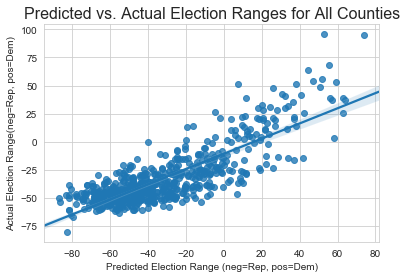

In [499]:
ax = sns.regplot(y_test, y_pred)
ax.set(xlabel = 'Predicted Election Range (neg=Rep, pos=Dem)', ylabel = 'Actual Election Range(neg=Rep, pos=Dem)')
ax.set_title("Predicted vs. Actual Election Ranges for All Counties", fontsize=16)
plt.show()

In [500]:
lr.score(X_train, y_train)

0.6680352143522046

## Model Swing States 

In [501]:
s_modeling = swing_states.drop(swing_states.columns[[0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,34,35,36,37,38,39,40,52,53]], axis=1)

In [502]:
swing_states.head(0)

Empty DataFrame
Columns: [county_state, state, county, est_pop_2015, pop_change_2015, int_mig_2015, dom_mig_2015, mig_2015, FIPS Code, State, Area name, less_hs_diploma_2000, hs_diploma_only_2000, less_4_years_2000, four_or_ higher_2000, per_less_high_school diploma_2000, per_hs_diploma_only_2000, per_less_4_years_2000, per_four_or_ higher_2000, less_high_school_diploma_2011_15, hs_diploma_only_2011_15, less_4_years_2011_15, four_or_ higher_2011_15, per_less_high_school_diploma_2011_15, per_hs_diploma_only_2011_15, per_less_4_years_2011_15, per_four_or_higher_2011_15, div_index, af_am, native_2013, asian_am, pac_am, two_or_more_races, hisp_lat_am, white_am, county_fips, county_name, state_abbrev, 2013 uninsured rate, 2016 uninsured rate, decrease from 2013 to 2016, State_r, labor_force_2015, employed_2015, unemployed_2015, unemployment_rate_2015, med_household_income_2015, Unnamed: 0, votes_dem, votes_gop, total_votes, per_dem, per_gop, diff, per_point_diff, state_abbr, county_name_r, combined_fips, election_range, slight_dem, slight_gop, med_dem, med_gop, strong_dem, strong_gop]
Index: []

[0 rows x 65 columns]

In [503]:
s_modeling.head(0)

Empty DataFrame
Columns: [est_pop_2015, pop_change_2015, per_hs_diploma_only_2011_15, per_four_or_higher_2011_15, div_index, af_am, native_2013, asian_am, pac_am, two_or_more_races, hisp_lat_am, State_r, labor_force_2015, employed_2015, unemployed_2015, unemployment_rate_2015, med_household_income_2015, Unnamed: 0, votes_dem, votes_gop, total_votes, per_dem, per_point_diff, state_abbr, county_name_r, combined_fips, election_range, slight_dem, slight_gop, med_dem, med_gop, strong_dem, strong_gop]
Index: []

[0 rows x 33 columns]

In [504]:
s_modeling.columns

Index(['est_pop_2015', 'pop_change_2015', 'per_hs_diploma_only_2011_15',
       'per_four_or_higher_2011_15', 'div_index', 'af_am', 'native_2013',
       'asian_am', 'pac_am', 'two_or_more_races', 'hisp_lat_am', 'State_r',
       'labor_force_2015', 'employed_2015', 'unemployed_2015',
       'unemployment_rate_2015', 'med_household_income_2015', 'Unnamed: 0',
       'votes_dem', 'votes_gop', 'total_votes', 'per_dem', 'per_point_diff',
       'state_abbr', 'county_name_r', 'combined_fips', 'election_range',
       'slight_dem', 'slight_gop', 'med_dem', 'med_gop', 'strong_dem',
       'strong_gop'],
      dtype='object')

In [505]:
X = s_modeling[['est_pop_2015', 'pop_change_2015', 'per_hs_diploma_only_2011_15',
       'per_four_or_higher_2011_15', 'div_index', 'af_am', 'native_2013',
       'asian_am', 'pac_am', 'two_or_more_races', 'hisp_lat_am']] 
y = s_modeling['election_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [506]:
X.head()

est_pop_2015  pop_change_2015  per_hs_diploma_only_2011_15  \
4            7228             -189                         44.7   
9            3796              -75                         39.1   
40          13886             -175                         42.1   
75          12529              -99                         36.3   
106          5773              -20                         42.3   

     per_four_or_higher_2011_15  div_index  af_am  native_2013  asian_am  \
4                          15.3   0.054921    0.2          0.1       0.4   
9                          15.1   0.058873    0.3          0.5       0.6   
40                         16.3   0.159016    1.5          0.6       0.5   
75                         17.6   0.074125    0.6          0.3       0.3   
106                        14.3   0.049200    0.4          0.2       0.5   

     pac_am  two_or_more_races  hisp_lat_am  
4       0.0                0.7          1.5  
9       0.0                0.6          1.1  
40      0.3                1.0          5.8  
75      0.0                1.1          1.6  
106     0.0                0.7          0.9

In [507]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

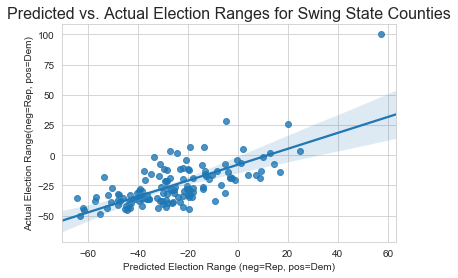

In [508]:
ax = sns.regplot(y_test, y_pred)
ax.set(xlabel = 'Predicted Election Range (neg=Rep, pos=Dem)', ylabel = 'Actual Election Range(neg=Rep, pos=Dem)')
ax.set_title("Predicted vs. Actual Election Ranges for Swing State Counties", fontsize=16)
plt.show()

In [509]:
lr.score(X_train, y_train)
# Right around the same R^2 score as all counties.

0.6600791228658442

## Classification

Now we want to see what features classify a county into being "slight dem", "slight gop, "med_dem", "med_gop", "strong_dem", and "strong_gop."

In [510]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, roc_curve, auc

In [511]:
# Setting the number of neighbors to the square root of number of instances is a good 
# rule of thumb.
knn = KNeighborsClassifier(n_neighbors = 55)
rfc = RandomForestClassifier(max_depth = 5) 

In [512]:
c_modeling.columns

Index(['est_pop_2015', 'pop_change_2015', 'per_hs_diploma_only_2011_15',
       'per_four_or_higher_2011_15', 'div_index', 'af_am', 'native_2013',
       'asian_am', 'pac_am', 'two_or_more_races', 'hisp_lat_am', 'State_r',
       'labor_force_2015', 'employed_2015', 'unemployed_2015',
       'unemployment_rate_2015', 'med_household_income_2015', 'Unnamed: 0',
       'votes_dem', 'votes_gop', 'total_votes', 'per_dem', 'per_point_diff',
       'state_abbr', 'county_name_r', 'combined_fips', 'election_range',
       'slight_dem', 'slight_gop', 'med_dem', 'med_gop', 'strong_dem',
       'strong_gop', 'slight_dem_False', 'slight_dem_True', 'slight_gop_False',
       'slight_gop_True', 'med_dem_False', 'med_dem_True', 'med_gop_False',
       'med_gop_True', 'strong_dem_False', 'strong_dem_True',
       'strong_gop_False', 'strong_gop_True'],
      dtype='object')

In [513]:
dummies = pd.get_dummies(modeling[['slight_dem','slight_gop','med_dem','med_gop','strong_dem','strong_gop']])
c_modeling = modeling.join(dummies)
c_modeling = c_modeling.reset_index()
c_modeling = c_modeling.drop(c_modeling[['index']], axis=1)

In [514]:
c_modeling.columns

Index(['est_pop_2015', 'pop_change_2015', 'per_hs_diploma_only_2011_15',
       'per_four_or_higher_2011_15', 'div_index', 'af_am', 'native_2013',
       'asian_am', 'pac_am', 'two_or_more_races', 'hisp_lat_am', 'State_r',
       'labor_force_2015', 'employed_2015', 'unemployed_2015',
       'unemployment_rate_2015', 'med_household_income_2015', 'Unnamed: 0',
       'votes_dem', 'votes_gop', 'total_votes', 'per_dem', 'per_point_diff',
       'state_abbr', 'county_name_r', 'combined_fips', 'election_range',
       'slight_dem', 'slight_gop', 'med_dem', 'med_gop', 'strong_dem',
       'strong_gop', 'slight_dem_False', 'slight_dem_True', 'slight_gop_False',
       'slight_gop_True', 'med_dem_False', 'med_dem_True', 'med_gop_False',
       'med_gop_True', 'strong_dem_False', 'strong_dem_True',
       'strong_gop_False', 'strong_gop_True'],
      dtype='object')

In [515]:
c_modeling.columns

Index(['est_pop_2015', 'pop_change_2015', 'per_hs_diploma_only_2011_15',
       'per_four_or_higher_2011_15', 'div_index', 'af_am', 'native_2013',
       'asian_am', 'pac_am', 'two_or_more_races', 'hisp_lat_am', 'State_r',
       'labor_force_2015', 'employed_2015', 'unemployed_2015',
       'unemployment_rate_2015', 'med_household_income_2015', 'Unnamed: 0',
       'votes_dem', 'votes_gop', 'total_votes', 'per_dem', 'per_point_diff',
       'state_abbr', 'county_name_r', 'combined_fips', 'election_range',
       'slight_dem', 'slight_gop', 'med_dem', 'med_gop', 'strong_dem',
       'strong_gop', 'slight_dem_False', 'slight_dem_True', 'slight_gop_False',
       'slight_gop_True', 'med_dem_False', 'med_dem_True', 'med_gop_False',
       'med_gop_True', 'strong_dem_False', 'strong_dem_True',
       'strong_gop_False', 'strong_gop_True'],
      dtype='object')

In [516]:
# Swing State Classifiers
dummies = pd.get_dummies(s_modeling[['slight_dem','slight_gop','med_dem','med_gop','strong_dem','strong_gop']])
cs_modeling = s_modeling.join(dummies)
cs_modeling = cs_modeling.reset_index()
#cs_modeling = cs_modeling.drop(c_modeling[['est_pop_2015']], axis=1)

## First test for slight dem and slight gop.

In [517]:
c_modeling.columns

Index(['est_pop_2015', 'pop_change_2015', 'per_hs_diploma_only_2011_15',
       'per_four_or_higher_2011_15', 'div_index', 'af_am', 'native_2013',
       'asian_am', 'pac_am', 'two_or_more_races', 'hisp_lat_am', 'State_r',
       'labor_force_2015', 'employed_2015', 'unemployed_2015',
       'unemployment_rate_2015', 'med_household_income_2015', 'Unnamed: 0',
       'votes_dem', 'votes_gop', 'total_votes', 'per_dem', 'per_point_diff',
       'state_abbr', 'county_name_r', 'combined_fips', 'election_range',
       'slight_dem', 'slight_gop', 'med_dem', 'med_gop', 'strong_dem',
       'strong_gop', 'slight_dem_False', 'slight_dem_True', 'slight_gop_False',
       'slight_gop_True', 'med_dem_False', 'med_dem_True', 'med_gop_False',
       'med_gop_True', 'strong_dem_False', 'strong_dem_True',
       'strong_gop_False', 'strong_gop_True'],
      dtype='object')

In [518]:
# First try KNN for just slight dem and slight gop.
X = c_modeling[['est_pop_2015', 'pop_change_2015', 'per_hs_diploma_only_2011_15',
       'per_four_or_higher_2011_15', 'div_index', 'af_am', 'native_2013',
       'asian_am', 'pac_am', 'two_or_more_races', 'hisp_lat_am']]
y = c_modeling[['slight_dem_False', 'slight_dem_True', 'slight_gop_False',
       'slight_gop_True']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [519]:
X.head()

est_pop_2015  pop_change_2015  per_hs_diploma_only_2011_15  \
0         24932                6                         37.5   
1         62577               79                         39.2   
2         32973              -25                         39.9   
3        434211             7364                         21.4   
4          7228             -189                         44.7   

   per_four_or_higher_2011_15  div_index  af_am  native_2013  asian_am  \
0                        12.3   0.445417   28.2          0.3       0.4   
1                        10.5   0.355956   18.3          0.3       0.4   
2                        18.8   0.539878   28.0          0.6       0.6   
3                        37.1   0.256622    1.3          0.8       2.6   
4                        15.3   0.054921    0.2          0.1       0.4   

   pac_am  two_or_more_races  hisp_lat_am  
0     0.0                1.3          1.2  
1     0.0                1.3          2.0  
2     0.2                1.5          9.0  
3     0.2                2.6          7.5  
4     0.0                0.7          1.5

In [520]:
y.head()

slight_dem_False  slight_dem_True  slight_gop_False  slight_gop_True
0                 1                0                 1                0
1                 1                0                 1                0
2                 1                0                 1                0
3                 1                0                 0                1
4                 1                0                 1                0

In [521]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=55, p=2,
           weights='uniform')

In [522]:
y_pred = knn.predict(X_test)

In [523]:
print(knn.score(X_train,y_train))
print(accuracy_score(y_test, y_pred))
print(cross_val_score(knn, X_train, y_train, cv=5))
print((classification_report(y_test,y_pred)))

0.8928715263793798
0.9017713365539453
[0.90342052 0.90140845 0.8832998  0.875      0.90120968]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       591
           1       0.00      0.00      0.00        30
           2       0.95      1.00      0.97       590
           3       0.00      0.00      0.00        31

   micro avg       0.95      0.95      0.95      1242
   macro avg       0.48      0.50      0.49      1242
weighted avg       0.90      0.95      0.93      1242
 samples avg       0.95      0.95      0.95      1242



/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Now test for medium gop and medium dem.

In [524]:
c_modeling.columns

Index(['est_pop_2015', 'pop_change_2015', 'per_hs_diploma_only_2011_15',
       'per_four_or_higher_2011_15', 'div_index', 'af_am', 'native_2013',
       'asian_am', 'pac_am', 'two_or_more_races', 'hisp_lat_am', 'State_r',
       'labor_force_2015', 'employed_2015', 'unemployed_2015',
       'unemployment_rate_2015', 'med_household_income_2015', 'Unnamed: 0',
       'votes_dem', 'votes_gop', 'total_votes', 'per_dem', 'per_point_diff',
       'state_abbr', 'county_name_r', 'combined_fips', 'election_range',
       'slight_dem', 'slight_gop', 'med_dem', 'med_gop', 'strong_dem',
       'strong_gop', 'slight_dem_False', 'slight_dem_True', 'slight_gop_False',
       'slight_gop_True', 'med_dem_False', 'med_dem_True', 'med_gop_False',
       'med_gop_True', 'strong_dem_False', 'strong_dem_True',
       'strong_gop_False', 'strong_gop_True'],
      dtype='object')

In [525]:
#KNN for med_dem and med_gop
X = c_modeling[['est_pop_2015', 'pop_change_2015', 'per_hs_diploma_only_2011_15',
       'per_four_or_higher_2011_15', 'div_index', 'af_am', 'native_2013',
       'asian_am', 'pac_am', 'two_or_more_races', 'hisp_lat_am']]
y = c_modeling[['med_dem_False', 'med_dem_True', 'med_gop_False',
       'med_gop_True']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_pred = knn.predict(X_test)

In [526]:
print (knn.score(X_train,y_train))
print (accuracy_score(y_test, y_pred))
print (cross_val_score(knn, X_train, y_train, cv=5))
print (classification_report(y_test,y_pred))

0.8260169150221506
0.8115942028985508
[0.82293763 0.81891348 0.81488934 0.83870968 0.83467742]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       589
           1       0.00      0.00      0.00        32
           2       0.86      1.00      0.93       536
           3       0.00      0.00      0.00        85

   micro avg       0.91      0.91      0.91      1242
   macro avg       0.45      0.50      0.48      1242
weighted avg       0.82      0.91      0.86      1242
 samples avg       0.91      0.91      0.91      1242



/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Now test for strong gop and strong dem.

In [527]:
#KNN for strong dem and stronggop
X = c_modeling[['est_pop_2015', 'pop_change_2015', 'per_hs_diploma_only_2011_15',
       'per_four_or_higher_2011_15', 'div_index', 'af_am', 'native_2013',
       'asian_am', 'pac_am', 'two_or_more_races', 'hisp_lat_am']]
y = c_modeling[['strong_dem_False', 'strong_dem_True',
       'strong_gop_False', 'strong_gop_True']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_pred = knn.predict(X_test)

In [528]:
print (knn.score(X_train,y_train))
print (accuracy_score(y_test, y_pred))
print (cross_val_score(knn, X_train, y_train, cv=5))
print (classification_report(y_test,y_pred))

0.6270640354409988
0.6312399355877617
[0.5694165  0.6277666  0.65794769 0.64314516 0.60080645]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       593
           1       0.00      0.00      0.00        28
           2       0.68      1.00      0.81       420
           3       0.00      0.00      0.00       201

   micro avg       0.82      0.82      0.82      1242
   macro avg       0.41      0.50      0.45      1242
weighted avg       0.68      0.82      0.74      1242
 samples avg       0.82      0.82      0.82      1242



/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Swing States Classifiers

In [529]:
cs_modeling.columns

Index(['index', 'est_pop_2015', 'pop_change_2015',
       'per_hs_diploma_only_2011_15', 'per_four_or_higher_2011_15',
       'div_index', 'af_am', 'native_2013', 'asian_am', 'pac_am',
       'two_or_more_races', 'hisp_lat_am', 'State_r', 'labor_force_2015',
       'employed_2015', 'unemployed_2015', 'unemployment_rate_2015',
       'med_household_income_2015', 'Unnamed: 0', 'votes_dem', 'votes_gop',
       'total_votes', 'per_dem', 'per_point_diff', 'state_abbr',
       'county_name_r', 'combined_fips', 'election_range', 'slight_dem',
       'slight_gop', 'med_dem', 'med_gop', 'strong_dem', 'strong_gop',
       'slight_dem_False', 'slight_dem_True', 'slight_gop_False',
       'slight_gop_True', 'med_dem_False', 'med_dem_True', 'med_gop_False',
       'med_gop_True', 'strong_dem_False', 'strong_dem_True',
       'strong_gop_False', 'strong_gop_True'],
      dtype='object')

In [530]:
#First slight dem and slight gop
X = cs_modeling[['est_pop_2015', 'pop_change_2015', 'per_hs_diploma_only_2011_15',
       'per_four_or_higher_2011_15', 'div_index', 'af_am', 'native_2013',
       'asian_am', 'pac_am', 'two_or_more_races', 'hisp_lat_am']]
y = cs_modeling[['slight_dem_False', 'slight_dem_True', 'slight_gop_False',
       'slight_gop_True']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=55, p=2,
           weights='uniform')

In [531]:
y_pred = knn.predict(X_test)

In [532]:
print (knn.score(X_train,y_train))
print (accuracy_score(y_test, y_pred))
print (cross_val_score(knn, X_train, y_train, cv=5))
print (classification_report(y_test,y_pred))

0.8563327032136105
0.8796992481203008
[0.85849057 0.87735849 0.83962264 0.86792453 0.83809524]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       124
           1       0.00      0.00      0.00         9
           2       0.95      1.00      0.97       126
           3       0.00      0.00      0.00         7

   micro avg       0.94      0.94      0.94       266
   macro avg       0.47      0.50      0.48       266
weighted avg       0.88      0.94      0.91       266
 samples avg       0.94      0.94      0.94       266



/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Medium Dem and GOP 

In [533]:
#KNN for med_dem and med_gop
X = cs_modeling[['est_pop_2015', 'pop_change_2015', 'per_hs_diploma_only_2011_15',
       'per_four_or_higher_2011_15', 'div_index', 'af_am', 'native_2013',
       'asian_am', 'pac_am', 'two_or_more_races', 'hisp_lat_am']]
y = cs_modeling[['med_dem_False', 'med_dem_True', 'med_gop_False',
       'med_gop_True']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_pred = knn.predict(X_test)

In [534]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=55, p=2,
           weights='uniform')

In [535]:
print (knn.score(X_train,y_train))
print (accuracy_score(y_test, y_pred))
print (cross_val_score(knn, X_train, y_train, cv=5))
print (classification_report(y_test,y_pred))

0.7448015122873346
0.7819548872180451
[0.80188679 0.69811321 0.74528302 0.73584906 0.74285714]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       130
           1       0.00      0.00      0.00         3
           2       0.80      1.00      0.89       107
           3       0.00      0.00      0.00        26

   micro avg       0.89      0.89      0.89       266
   macro avg       0.45      0.50      0.47       266
weighted avg       0.80      0.89      0.84       266
 samples avg       0.89      0.89      0.89       266



/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Strong Dem and GOP

In [536]:
X = cs_modeling[['est_pop_2015', 'pop_change_2015', 'per_hs_diploma_only_2011_15',
       'per_four_or_higher_2011_15', 'div_index', 'af_am', 'native_2013',
       'asian_am', 'pac_am', 'two_or_more_races', 'hisp_lat_am']]
y = cs_modeling[['strong_dem_False', 'strong_dem_True',
       'strong_gop_False', 'strong_gop_True']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_pred = knn.predict(X_test)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=55, p=2,
           weights='uniform')

In [537]:
print (knn.score(X_train,y_train))
print (accuracy_score(y_test, y_pred))
print (cross_val_score(knn, X_train, y_train, cv=5))
print(classification_report(y_test,y_pred))

0.5954631379962193
0.42857142857142855
[0.53773585 0.63207547 0.54716981 0.52830189 0.5047619 ]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       124
           1       0.00      0.00      0.00         9
           2       0.50      1.00      0.66        66
           3       0.00      0.00      0.00        67

   micro avg       0.71      0.71      0.71       266
   macro avg       0.36      0.50      0.41       266
weighted avg       0.56      0.71      0.61       266
 samples avg       0.71      0.71      0.71       266



/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Modeling for the "strong" counties of 25-50% is not as predictive. 

In [538]:
## Random Forests

# RFC for slight dem and slight gop

In [539]:
X = c_modeling[['est_pop_2015', 'pop_change_2015', 'per_hs_diploma_only_2011_15',
       'per_four_or_higher_2011_15', 'div_index', 'af_am', 'native_2013',
       'asian_am', 'pac_am', 'two_or_more_races', 'hisp_lat_am']]
y = c_modeling[['slight_dem_False', 'slight_dem_True', 'slight_gop_False',
       'slight_gop_True']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [540]:
rfc.fit(X_train, y_train)

/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [541]:
y_pred = rfc.predict(X_test)

In [542]:
print (rfc.score(X_train,y_train))
print (accuracy_score(y_test, y_pred))
print (cross_val_score(rfc, X_train, y_train, cv=5))
print(classification_report(y_test,y_pred))

0.8944824808699154
0.9017713365539453
[0.90342052 0.90140845 0.8832998  0.875      0.90322581]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       591
           1       0.00      0.00      0.00        30
           2       0.95      1.00      0.97       590
           3       0.00      0.00      0.00        31

   micro avg       0.95      0.95      0.95      1242
   macro avg       0.48      0.50      0.49      1242
weighted avg       0.90      0.95      0.93      1242
 samples avg       0.95      0.95      0.95      1242



/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# RFC for medium dem and medium gop

In [543]:
X = c_modeling[['est_pop_2015', 'pop_change_2015', 'per_hs_diploma_only_2011_15',
       'per_four_or_higher_2011_15', 'div_index', 'af_am', 'native_2013',
       'asian_am', 'pac_am', 'two_or_more_races', 'hisp_lat_am']]
y = c_modeling[['med_dem_False', 'med_dem_True', 'med_gop_False',
       'med_gop_True']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [544]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [545]:
y_pred = rfc.predict(X_test)

In [546]:
print (rfc.score(X_train,y_train))
print (accuracy_score(y_test, y_pred))
print (cross_val_score(rfc, X_train, y_train, cv=5))
print(classification_report(y_test,y_pred))

0.8336689488521949
0.8132045088566827
[0.82092555 0.81891348 0.81690141 0.83669355 0.83669355]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       589
           1       0.00      0.00      0.00        32
           2       0.86      1.00      0.93       536
           3       1.00      0.01      0.02        85

   micro avg       0.91      0.91      0.91      1242
   macro avg       0.70      0.50      0.48      1242
weighted avg       0.89      0.91      0.86      1242
 samples avg       0.91      0.91      0.91      1242



/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# RFC for strong dem and strong gop

In [547]:
X = c_modeling[['est_pop_2015', 'pop_change_2015', 'per_hs_diploma_only_2011_15',
       'per_four_or_higher_2011_15', 'div_index', 'af_am', 'native_2013',
       'asian_am', 'pac_am', 'two_or_more_races', 'hisp_lat_am']]
y = c_modeling[['slight_dem_False', 'slight_dem_True', 'slight_gop_False',
       'slight_gop_True']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [548]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [549]:
y_pred = rfc.predict(X_test)

In [550]:
print (rfc.score(X_train,y_train))
print (accuracy_score(y_test, y_pred))
print (cross_val_score(knn, X_train, y_train, cv=5))
print(classification_report(y_test,y_pred))

0.896093435360451
0.9017713365539453
[0.90342052 0.90140845 0.8832998  0.875      0.90120968]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       591
           1       0.00      0.00      0.00        30
           2       0.95      1.00      0.97       590
           3       0.00      0.00      0.00        31

   micro avg       0.95      0.95      0.95      1242
   macro avg       0.48      0.50      0.49      1242
weighted avg       0.90      0.95      0.93      1242
 samples avg       0.95      0.95      0.95      1242



/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/swarasalih/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [551]:
# RFC is a much better classifier than KNN.